In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

sns.set_theme(style="whitegrid", font_scale=2)

In [19]:
methods_dict = {
    '20/20+': 'Statistical',
    'ACTINN': 'Neural Network',
    'ANF': 'Statistical',
    'Adaptive boosting': 'Boosting',
    'Aggregated Cauchy association test (ACAT)': 'Statistical',
    'BERT6mA (NN)': 'Neural Network',
    'Block forest': 'Random Forest',
    'CCA': 'Statistical',
    'CELLBLAST': 'Neural Network',
    'CLR': 'Statistical',
    'CNN-AE': 'Convolutional Neural Network',
    'CNN-LSTM': 'Convolutional Neural Network',
    'COCA': 'Statistical',
    'COX': 'Statistical',
    'CaSTLe': 'Neural Network',
    'Cobolt (NN)': 'Neural Network',
    'Convolutional Neural network (CNN)': 'Convolutional Neural Network',
    'Cox-nnet': 'Neural Network',
    'DCAP (NN)': 'Neural Network',
    'DFNet': 'Neural Network',
    'Decision tree': 'Decision Tree',
    'Deep6mA (NN)': 'Neural Network',
    'DeepCC (NN)': 'Neural Network',
    'DeepChrome': 'Neural Network',
    'DeepDiff': 'Neural Network',
    'DeepFIGV (NN)': 'Neural Network',
    'DeepHIT': 'Neural Network',
    'DeepLIFT': 'Interpretation',
    'DeepMotif': 'Neural Network',
    'DeepOmix': 'Neural Network',
    'DeepWalk (statistical)': 'Statistical',
    'Deepsurv': 'Neural Network',
    'DrugCell (NN)': 'Neural Network',
    'EMOGI (NN)': 'Neural Network',
    'ElasticNet': 'Linear Method',
    'Ensemble': 'Ensemble',
    'ExPecto (NN)': 'Neural Network',
    'FINEMAP': 'Statistical',
    'Factor analysis': 'Statistical',
    'Flux balance analysis': 'Statistical',
    'GBJ': 'Statistical',
    'GENIE3 (tree-based)': 'Random Forest',
    'GRNboost': 'Boosting',
    'GWAS': 'Statistical',
    'GWAS marked SNPs + ML': 'Statistical',
    'Genetic Risk Score (GRS)': 'Statistical',
    'Grad*Input': 'Interpretation',
    'Guilt by association': 'Statistical',
    'Harmony': 'Statistical',
    'ICA': 'Statistical',
    'Inferelator (statistical)': 'Statistical',
    'K-nearest neighbors KNN': 'K-nearest neighbors',
    'Kullback-Leibler divergence': 'Statistical',
    'L2X': 'Interpretation',
    'LDVAE': 'Variational Autoencoder',
    'LIGER': 'Statistical',
    'LRP': 'Interpretation',
    'Lasso': 'Linear Method',
    'Latent space variance': 'Statistical',
    'Linear regression': 'Linear Method',
    'Logistic regression': 'Linear Method',
    'LogitBoost': 'Boosting',
    'MAGMA': 'Statistical',
    'MAUI (NN)': 'Neural Network',
    'MCCA': 'Statistical',
    'MDR': 'Statistical',
    'MOFA+': 'Statistical',
    'MOGONET (NN)': 'Neural Network',
    'MRNET': 'Random Forest',
    'MUSE (statistical)': 'Statistical',
    'Manual': 'Manual',
    'Markercount': 'Statistical',
    'MiNet': 'Neural Network',
    'Multi-Network Multi-Classifier (MNMC)': 'Neural Network',
    'MutSigCV': 'Statistical',
    'Mutual information': 'Statistical',
    'Naive Bayes': 'Linear Method',
    'Negative matrix factorization': 'Statistical',
    'Neural network': 'Neural Network',
    'Onotype': 'Statistical',
    'PCA': 'Statistical',
    'PGDNN (NN)': 'Neural Network',
    'PLS': 'Linear Method',
    'PageRank (statistical)': 'Statistical',
    'Pegasus': 'Statistical',
    'Random': 'Statistical',
    'Random Forest': 'Random Forest',
    'ReChrome (NN)': 'Neural Network',
    'ReliefF': 'Statistical',
    'Ridge regression': 'Linear Method',
    'SMILE (NN)': 'Neural Network',
    'SNF': 'Statistical',
    'Saliency': 'Interpretation',
    'Saliency * activation': 'Interpretation',
    'SciBet': 'Neural Network',
    'Scnanorama': 'Neural Network',
    'Sequence kernel association test (SKAT(': 'Statistical',
    'Seurat': 'Statistical',
    'Single value decomposition (SVD)': 'Statistical',
    'SingleCellNet': 'Neural Network',
    'SingleR': 'Statistical',
    'Spectral': 'Statistical',
    'SuSie': 'Statistical',
    'SubtypeGAN (NN)': 'Neural Network',
    'Support vector machine (SVM)': 'Support Vector Machine',
    'SurvivalNet': 'Neural Network',
    'Symphony': 'Statistical',
    'UMAP': 'Statistical',
    'VAE': 'Variational Autoencoder',
    'XGboost': 'Boosting',
    'chetah': 'Decision Tree',
    'condition Restricted Boltzmann Machine': 'Neural Network',
    'deepPINK (NN)': 'Neural Network',
    'deepSHAP': 'Interpretation',
    'edgeR': 'Statistical',
    'glmBoost': 'Boosting',
    'glmgraph': 'Graph Neural Network',
    'gradient boosting': 'Boosting',
    'gradientSHAP': 'Interpretation',
    'graph NN': 'Graph Neural Network',
    'iCluster': 'Statistical',
    'iClusterBayes': 'Statistical',
    'iDNA-ABT (NN)': 'Neural Network',
    'iDNA-MS (RF/SVM)': 'Random Forest',
    'iDNA-MS (RF/SVM)': 'Support Vector Machine',
    'l-spline': 'Statistical',
    'multi-factor analysis (MFA)': 'Statistical',
    'scArches + scVI': 'Neural Network',
    'scETM (NN)': 'Neural Network',
    'scMM (NN)': 'Neural Network',
    'scTyper': 'Neural Network',
    'scVAE-GM': 'Variational Autoencoder',
    'scVI': 'Variational Autoencoder',
    'scmapcell': 'Statistical',
    'scmapcluster': 'Statistical',
    't-SNE': 'Statistical',
    'totalVI (NN)': 'Neural Network'
}


In [20]:
outPath = "figures"

In [21]:
pd_table1 = pd.read_csv("data/Table_6.csv")
pd_table1["Baselines"] = pd_table1["Baselines"].fillna("")
baselines=[]
for i in range(pd_table1.shape[0]):
    for x in pd_table1.iloc[i]["Baselines"].split(","):
        baselines.append(x)

Baselines = [x.lstrip(" ") for x in baselines]


In [22]:
pd_Table_1_data_type = pd_table1.copy()
pd_Table_1_data_type = pd.concat([pd_Table_1_data_type, pd_Table_1_data_type['Baselines'].str.split(', ', expand=True)], axis=1)
df_merged = pd.concat([pd_Table_1_data_type[x] for x in range(pd_Table_1_data_type['Baselines'].str.split(', ', expand=True).shape[1]) ], ignore_index=True)

df = pd.DataFrame(df_merged.value_counts())
df = df.loc[list(methods_dict.keys()),]
df["cat"] = methods_dict.values()
df
cat_list = []
labels_list = []

df_cat = {}
for cat in df["cat"].unique():
    df_cat[cat] = [df[df["cat"] == cat]['count'].sum()]



In [61]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df


pd_Table_1_data_type = pd_table1.copy()

per_task = tidy_split(pd_Table_1_data_type, "Task", ', ')
per_task = tidy_split(per_task, "Baselines", ', ')
print(per_task[["Baselines"]].isna().sum())

Baselines    0
dtype: int64


In [73]:
nn_dict = {'Convolutional Neural Network':'Neural Network', 'Graph Neural Network':'Neural Network', 'Variational Autoencoder':'Neural Network', }

In [91]:
per_task['Task'] = per_task['Task'].replace({'survival':"regression (supervised)"})
per_task['Category'] = per_task['Baselines'].map(methods_dict)
per_task['Category'] = per_task['Category'].replace(nn_dict)
per_task['Category'] = per_task['Category'].replace({"Decision Tree":"Decision tree", 
                                                     "Support Vector Machine":"Support vector machine",
                                                     "Neural Network":"Neural network",
                                                     "Linear Method":"Linear/logistic regression",
                                                     "Random Forest":"Random forest",
                                                     "Manual":"Manual method",
                                                     "Statistical":"Statistical method"})


per_task['Task'] = per_task['Task'].replace({"regression (supervised)":"Regression (supervised)", 
                                                     "classification (supervised)":"Classification (supervised)",
                                                     "clustering (unsupervised)":"Clustering (unsupervised)",
                                                     })

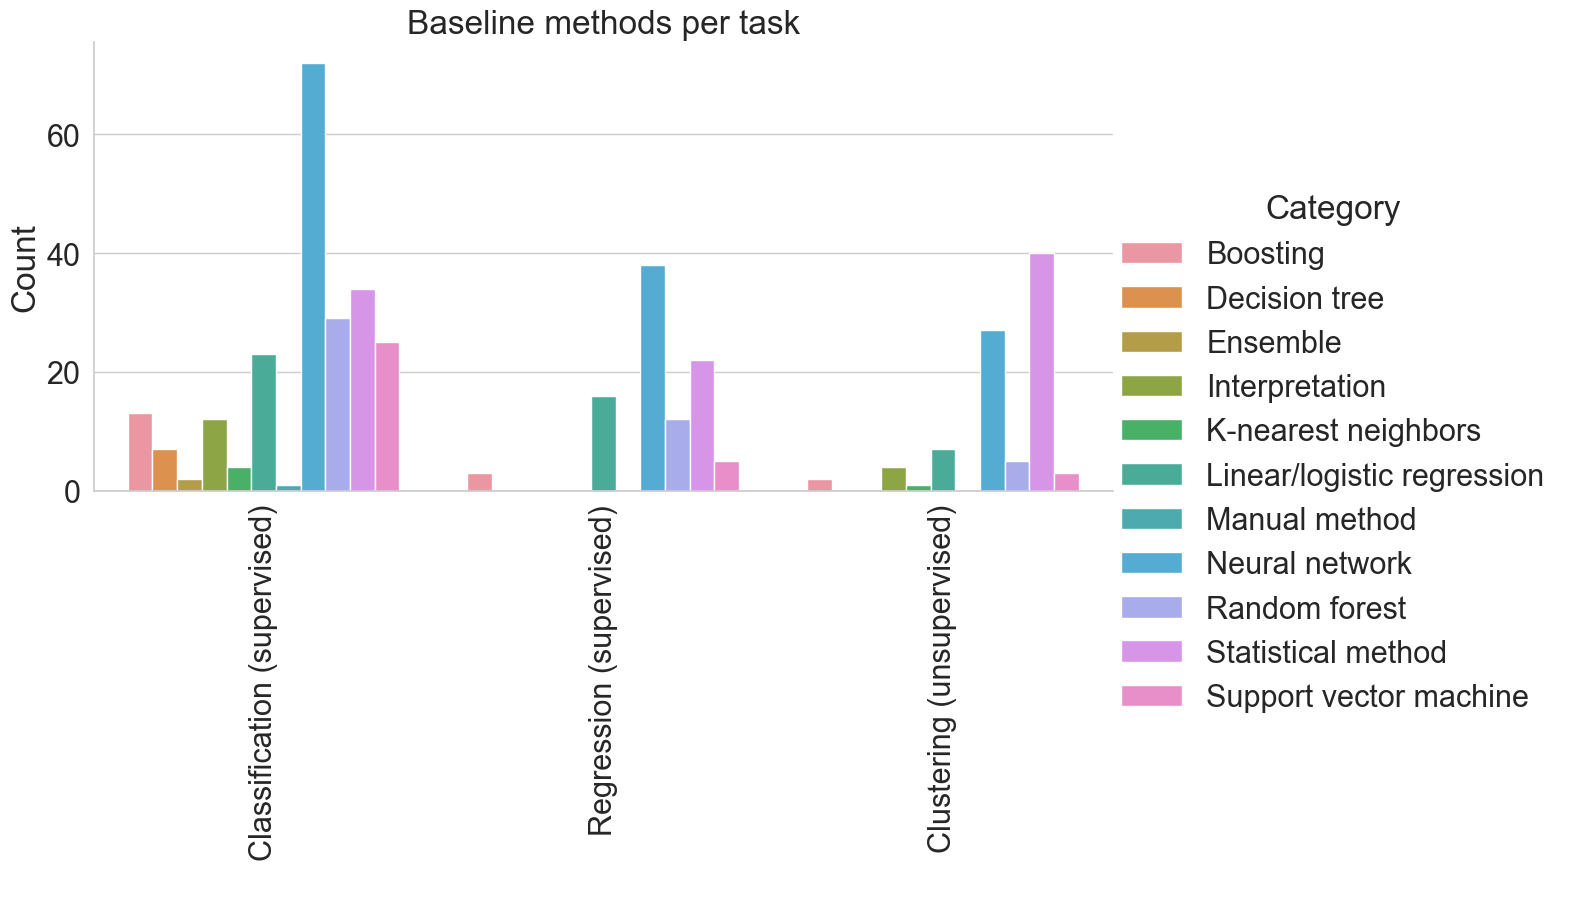

In [97]:

count_per_task = per_task.groupby(['Task', 'Category']).size().reset_index(name='Count')


sns.catplot(data=count_per_task, kind="bar", x="Task", y="Count", hue="Category", height=6, aspect=2, order = ['Classification (supervised)',"Regression (supervised)",'Clustering (unsupervised)'])

plt.title('Baseline methods per task')
plt.xlabel(' ')
plt.xticks(rotation = "vertical")
plt.ylabel('Count')
plt.savefig('figures/baseline_number_per_task.svg')
plt.savefig('figures/baseline_number_per_task.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
pd_Table_1_data_type

,Name,Baselines,Year,Title,Research question,Applications to,Task,Data type,Bulk/single cell,Which level,...,Prior knowledge,Computational resources used,Sample size,Inputsize,handpicked,Advantage,Disadvantage,Notes,old_interpretation_column,Last edited time
0,https://academic.oup.com/g3journal/article/11/...,PCA,2021.0,Visualizing population structure with variatio...,Visualize population structure,population genetics,clustering (unsupervised),SNPs,Bulk,SNPs,...,NaN,GPU (<13 GB),">100 & < 200, >1000 & <5000, unspecified",< 100 000,No,"simple, Easy to plot",limited embedding with two latent variables,NaN,other,"June 12, 2024 3:34 PM"
1,https://www.nature.com/articles/s42003-021-026...,"Lasso, Neural network",2021.0,GenNet framework: interpretable deep learning ...,Predicting phenotypes,"Oncology, heart disease, neurological disorder...",classification (supervised),"SNPs, WES",Bulk,"Cell type, Genes, Pathways, SNPs, Tissue type",...,"GTEx, Gene-annotations, KEGG","CPU, GPU (<13 GB)",">100 & < 200, >5000 & <10 000",> 1 mil,No,Every learned weight has a representation,"limitedly data driven, quality of prior knowledge",NaN,"GTEx, KEGG, connection-weight, gene-annotation...","June 9, 2024 4:28 PM"
2,https://www.nature.com/articles/s41586-021-039...,"Adaptive boosting, Decision tree, Logistic reg...",2021.0,Biologically informed deep neural network for ...,Predicting cancer,Oncology,classification (supervised),"CNV, CpGs (methylation), Fusions, SNV, mRNA (g...",Bulk,"Genes, Pathways, SNPs",...,"Gene-annotations, Reactome","CPU, GPU (<13 GB), Unspecified",>1000 & <5000,< 100 000,Yes,Every learned weight has a representation,"limitedly data driven, quality of prior knowledge",NaN,DeepLIFT,"June 9, 2024 4:23 PM"
3,https://journals.plos.org/ploscompbiol/article...,"CCA, MOFA+, PLS, Single value decomposition (S...",2022.0,AIME: Autoencoder-based integrative multi-omic...,Extract embedding from one omics that captures...,Oncology,clustering (unsupervised),"mRNA (gene expression), miRNA",Bulk,miRNA,...,NaN,Unspecified,>500 & <1000,< 10000,No,"Easy method, can be applied to any network",only pairwise effects observable (1 input feat...,NaN,permutation,"June 16, 2024 7:40 PM"
4,https://www.nature.com/articles/s41556-022-010...,"Seurat, Symphony, scArches + scVI",2022.0,Biologically informed deep learning to inferge...,Develop an interpretable bottleneck for single...,"covid, immune",clustering (unsupervised),sc-transcriptomics,Single-cell,"Gene sets, Genes",...,"PanglaoDB, Reactome",Unspecified,">10 000 & <50 000, >100 000 & < 200 000",< 10000,Yes,latent variables are directly interpretable as...,Linear decoder. Requires a lot of data,not sure semi-local or global,NaN,"May 31, 2024 5:18 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,https://www.biorxiv.org/content/10.1101/2023.0...,Inferelator (statistical),2023.0,Structure Primed Embedding on the Transcriptio...,predict gene regulatory networks (GRNs),microorganisms,classification (supervised),"mRNA (gene expression), sc-ATAC, sc-transcript...",Single-cell,"Gene sets, Genes",...,NaN,Unspecified,>10 000 & <50 000,< 50000,No,Evaluated both a shallow and a deeper (hierarc...,Requires to retrain the network after each pru...,NaN,NaN,"June 16, 2024 8:35 PM"
122,https://www.nature.com/articles/s41586-023-061...,"Logistic regression, Random Forest, Support ve...",2023.0,Transfer learning enables predictions in netwo...,Transfer learning enabling context-specific pr...,"Oncology, drug development, heart disease",classification (supervised),sc-transcriptomics,Single-cell,Genes,...,NaN,multi-gpu,~ 30 000 000,< 5000,No,Easy in-silico perturbations,Strategy of rank value encoding? No informatio...,Pretraining: 3 days with 12x Nvidia V100 32GB ...,NaN,"June 13, 2024 11:19 AM"
123,https://www.nature.com/articles/s41592-024-022...,"Harmony, Seurat, scVI",2024.0,scGPT: toward building a foundation model for ...,Transfer learning enabling cell type\nannotat

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Statistical'),
  Text(1, 0, 'Neural Network'),
  Text(2, 0, 'Boosting'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Convolutional Neural Network'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'Interpretation'),
  Text(7, 0, 'Linear Method'),
  Text(8, 0, 'Ensemble'),
  Text(9, 0, 'K-nearest neighbors'),
  Text(10, 0, 'Variational Autoencoder'),
  Text(11, 0, 'Manual'),
  Text(12, 0, 'Support Vector Machine'),
  Text(13, 0, 'Graph Neural Network')])

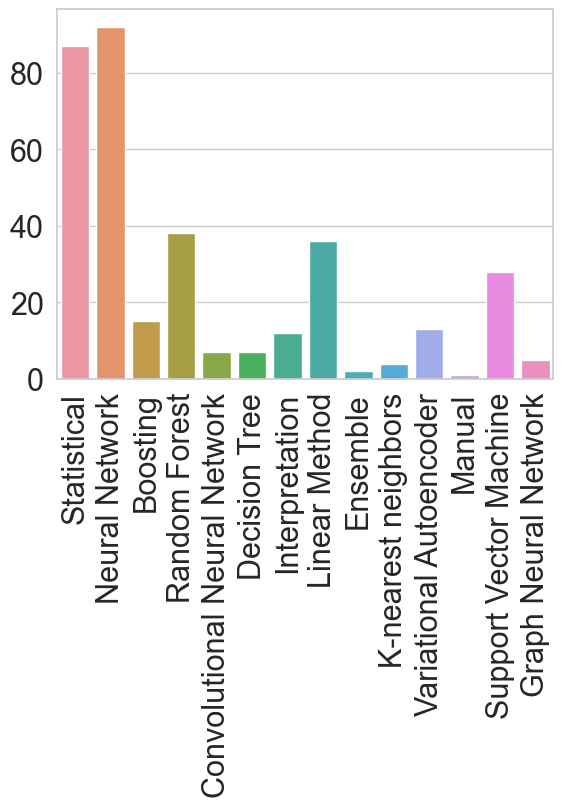

In [24]:
sns.barplot(pd.DataFrame(df_cat))
plt.xticks(rotation = "vertical")